In [2]:
# Install yfinance library
!pip install yfinance


  Using cached yfinance-0.2.22-py2.py3-none-any.whl (63 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached frozendict-2.3.8-cp310-cp310-win_amd64.whl (35 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)


# LIBRARIES #

In [101]:
# import relevant libraries
import yfinance as yf
import pandas as pd
import hvplot.pandas
import numpy as np
import seaborn as sns
%matplotlib inline

# DATA SET RETRIEVAL #

In [102]:
#RETRIEVE THE 5-YEAR DATA FROM YAHOO FINANCE
all_data = yf.download(tickers = "MRNA GOLD ETH-USD XOM DLR BTC-USD NKE OSTK",  # list of tickers
            period = "5y",         # time period
            interval = "1d",       # trading interval
            prepost = False,       # download pre/post market hours data?
            repair = True)         # repair obvious price errors e.g. 100x?
all_data = all_data.drop(columns=['Adj Close', 'High', 'Low', 'Open', 'Repaired?', 'Volume']).dropna()
all_data

[*********************100%***********************]  8 of 8 completed


Close                                                  \
                 BTC-USD         DLR      ETH-USD       GOLD        MRNA   
Date                                                                       
2018-12-07   3419.937256  115.720001    93.294563  13.680000   18.600000   
2018-12-10   3502.656006  116.349998    91.685654  13.840000   18.799999   
2018-12-11   3424.588135  116.790001    88.945305  13.600000   18.010000   
2018-12-12   3486.950195  115.599998    90.593300  14.020000   18.680000   
2018-12-13   3313.677246  115.360001    86.539314  14.110000   18.760000   
...                  ...         ...          ...        ...         ...   
2023-07-11  30620.951172  116.419998  1878.336060  16.709999  122.129997   
2023-07-12  30391.646484  117.750000  1872.113770  17.480000  125.919998   
2023-07-13  31476.048828  118.290001  2006.511475  17.600000  126.610001   
2023-07-14  30334.068359  118.279999  1939.347046  17.350000  121.349998   
2023-07-17  30241.246094  117.810097  1913.213745  17.230000  120.800003   

                                               
                   NKE       OSTK         XOM  
Date                                           
2018-12-07   73.339996  17.370001   77.639999  
2018-12-10   72.510002  18.860001   76.540001  
2018-12-11   73.570000  18.790001   76.680000  
2018-12-12   74.320000  19.100000   76.019997  
2018-12-13   72.930000  17.980000   76.980003  
...                ...        ...         ...  
2023-07-11  107.389999  30.719999  105.970001  
2023-07-12  107.760002  30.780001  106.489998  
2023-07-13  107.839996  31.809999  104.540001  
2023-07-14  107.949997  31.280001  100.940002  
2023-07-17  107.260002  31.340000  100.750000  

[1158 rows x 8 columns]

# PERIOD ANALYZED 07/12/2018 - 07/13/2023 #

##### Daily Returns 

In [103]:
all_data_daily_returns = all_data.pct_change()
all_data_daily_returns

Close                                                    \
             BTC-USD       DLR   ETH-USD      GOLD      MRNA       NKE   
Date                                                                     
2018-12-07       NaN       NaN       NaN       NaN       NaN       NaN   
2018-12-10  0.024187  0.005444 -0.017245  0.011696  0.010753 -0.011317   
2018-12-11 -0.022288  0.003782 -0.029889 -0.017341 -0.042021  0.014619   
2018-12-12  0.018210 -0.010189  0.018528  0.030882  0.037202  0.010194   
2018-12-13 -0.049692 -0.002076 -0.044749  0.006419  0.004283 -0.018703   
...              ...       ...       ...       ...       ...       ...   
2023-07-11  0.006789  0.021138 -0.001181  0.010889 -0.007799  0.015220   
2023-07-12 -0.007488  0.011424 -0.003313  0.046080  0.031033  0.003445   
2023-07-13  0.035681  0.004586  0.071789  0.006865  0.005480  0.000742   
2023-07-14 -0.036281 -0.000085 -0.033473 -0.014205 -0.041545  0.001020   
2023-07-17 -0.003060 -0.003973 -0.013475 -0.006916 -0.004532 -0.006392   

                                
                OSTK       XOM  
Date                            
2018-12-07       NaN       NaN  
2018-12-10  0.085780 -0.014168  
2018-12-11 -0.003712  0.001829  
2018-12-12  0.016498 -0.008607  
2018-12-13 -0.058639  0.012628  
...              ...       ...  
2023-07-11  0.038540  0.012227  
2023-07-12  0.001953  0.004907  
2023-07-13  0.033463 -0.018312  
2023-07-14 -0.016661 -0.034437  
2023-07-17  0.001918 -0.001882  

[1158 rows x 8 columns]

<Axes: xlabel='Date'>

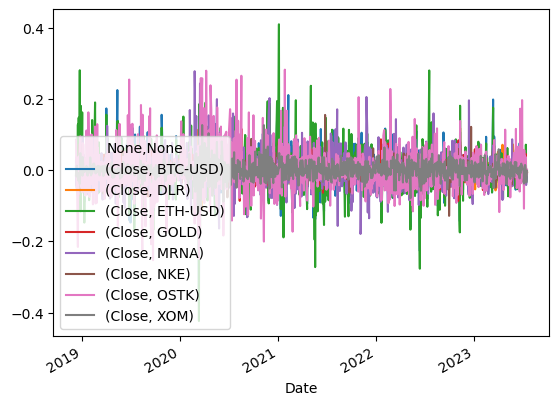

In [104]:
all_data_daily_returns.plot(kind = 'line')

##### Cumulative Returns 

In [105]:
daily_pct_change = all_data.pct_change()
daily_cumulative_returns = (1 + daily_pct_change).cumprod()
daily_cumulative_returns

Close                                                     \
             BTC-USD       DLR    ETH-USD      GOLD      MRNA       NKE   
Date                                                                      
2018-12-07       NaN       NaN        NaN       NaN       NaN       NaN   
2018-12-10  1.024187  1.005444   0.982755  1.011696  1.010753  0.988683   
2018-12-11  1.001360  1.009246   0.953381  0.994152  0.968280  1.003136   
2018-12-12  1.019595  0.998963   0.971046  1.024854  1.004301  1.013362   
2018-12-13  0.968929  0.996889   0.927592  1.031433  1.008602  0.994410   
...              ...       ...        ...       ...       ...       ...   
2023-07-11  8.953659  1.006049  20.133392  1.221491  6.566129  1.464276   
2023-07-12  8.886609  1.017542  20.066697  1.277778  6.769892  1.469321   
2023-07-13  9.203692  1.022209  21.507271  1.286550  6.806989  1.470412   
2023-07-14  8.869773  1.022122  20.787353  1.268275  6.524193  1.471912   
2023-07-17  8.842632  1.018062  20.507237  1.259503  6.494624  1.462504   

                                
                OSTK       XOM  
Date                            
2018-12-07       NaN       NaN  
2018-12-10  1.085780  0.985832  
2018-12-11  1.081750  0.987635  
2018-12-12  1.099597  0.979134  
2018-12-13  1.035118  0.991499  
...              ...       ...  
2023-07-11  1.768566  1.364889  
2023-07-12  1.772021  1.371587  
2023-07-13  1.831318  1.346471  
2023-07-14  1.800806  1.300103  
2023-07-17  1.804260  1.297656  

[1158 rows x 8 columns]

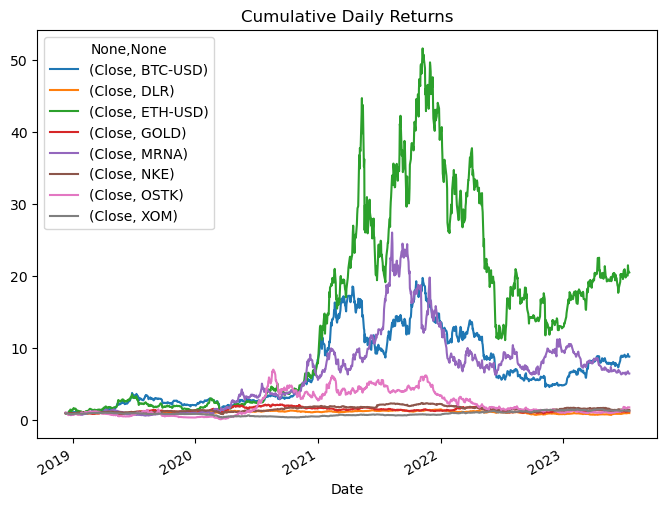

In [106]:
# Plot cumulative daily returns to have a visual representation of stock peformance
daily_cumulative_returns.plot(
    figsize=(8,6),
    title= 'Cumulative Daily Returns'
                             );


##### Standard deviation 

##### Over the course of 2019 through June 2023, Overstock was had the highest price fluctuation

In [107]:
#standard deviation of daily returns between January 2019 and end of second quarter 2023 for each stock
daily_returns.std().sort_values(ascending=False)

Close  OSTK       0.061064
       ETH-USD    0.057438
       MRNA       0.048342
       BTC-USD    0.043888
       GOLD       0.023484
       XOM        0.022292
       NKE        0.021279
       DLR        0.020134
dtype: float64

##### Correlation

In [110]:
correlation = all_data.corr()
correlation

Close                                                    \
                BTC-USD       DLR   ETH-USD      GOLD      MRNA       NKE   
Close BTC-USD  1.000000  0.473898  0.921207  0.205975  0.787148  0.852523   
      DLR      0.473898  1.000000  0.424881  0.606712  0.425104  0.598812   
      ETH-USD  0.921207  0.424881  1.000000  0.106553  0.847149  0.825712   
      GOLD     0.205975  0.606712  0.106553  1.000000  0.129492  0.363995   
      MRNA     0.787148  0.425104  0.847149  0.129492  1.000000  0.850259   
      NKE      0.852523  0.598812  0.825712  0.363995  0.850259  1.000000   
      OSTK     0.673343  0.724359  0.572486  0.544576  0.610953  0.766509   
      XOM      0.015326 -0.695080  0.180100 -0.574267  0.082545 -0.133897   

                                   
                   OSTK       XOM  
Close BTC-USD  0.673343  0.015326  
      DLR      0.724359 -0.695080  
      ETH-USD  0.572486  0.180100  
      GOLD     0.544576 -0.574267  
      MRNA     0.610953  0.082545  
      NKE      0.766509 -0.133897  
      OSTK     1.000000 -0.452936  
      XOM     -0.452936  1.000000

<Axes: xlabel='None-None', ylabel='None-None'>

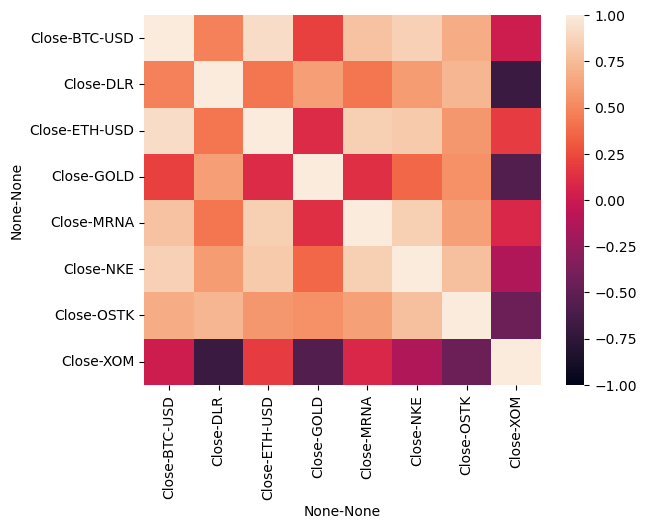

In [111]:
sns.heatmap(correlation, vmin=-1, vmax=1)

##### Volatility

In [112]:
# Volatility over the entire peroid
volatility = daily_returns.std() * np.sqrt(252*5)
volatility.sort_values(inplace=True)
volatility

Close  DLR        0.714699
       NKE        0.755314
       XOM        0.791275
       GOLD       0.833598
       BTC-USD    1.557852
       MRNA       1.715976
       ETH-USD    2.038862
       OSTK       2.167550
dtype: float64

In [113]:
# Volatility over the entire peroid

volatility_bar = pd.DataFrame(
    {
        "ticker": ['DLR', 'NKE', 'XOM', 'GOLD', 'BTC-USD', 'MRNA', 'ETH-USD', 'OSTK'],
        "volatility": (0.715083,0.755923,0.791711,0.832871,1.558620,1.717229,2.039533,2.169218),
    }
)


volatility_bar.hvplot.bar(
    x="ticker", 
    y="volatility", 
    xlabel="Ticker", 
    ylabel="volatility", 
    title = "Volatility over the entire period",
    rot=90
)

:Bars   [ticker]   (volatility)

# Pre-Pandemic 01/01/2019 to 12/31/2019

##### Standard Deviation

In [114]:
#standard deviation(STD) of DAILY RETURNS PRE-PANDEMIC
daily_returns_all_data_pre = daily_returns.loc['2019-01-01':'2019-12-31']
daily_returns_all_data_pre.std().sort_values(ascending=True)

Close  XOM        0.011710
       DLR        0.012524
       NKE        0.013064
       GOLD       0.019712
       MRNA       0.038367
       BTC-USD    0.043729
       ETH-USD    0.048164
       OSTK       0.063574
dtype: float64

In [131]:
std_bar_pre_pandemic = pd.DataFrame(
    {
        "ticker": ['XOM', 'DLR', 'NKE', 'GOLD','MRNA', 'BTC-USD', 'ETH-USD', 'OSTK'],
        "standard deviation": (0.011710, 0.012524, 0.013064, 0.019712, 0.038367, 0.043729, 0.048164, 0.063574    ),
    }
)


std_bar_pre_pandemic.hvplot.bar(
    x="ticker", 
    y="standard deviation", 
    xlabel="Ticker", 
    ylabel="standard deviation", 
    title = "STANDARD DEVIATION PRE-PANDEMIC TIME",
    rot=90
)

:Bars   [ticker]   (standard deviation)

##### Correlation

In [115]:
#pre-pandemic correlation
correlation_pre= all_data.loc['2019-01-01':'2019-12-31'].corr()
correlation_pre

Close                                                    \
                BTC-USD       DLR   ETH-USD      GOLD      MRNA       NKE   
Close BTC-USD  1.000000  0.546145  0.756833  0.718589 -0.538527  0.188383   
      DLR      0.546145  1.000000  0.306394  0.579723 -0.105126  0.490517   
      ETH-USD  0.756833  0.306394  1.000000  0.156341 -0.285905 -0.163400   
      GOLD     0.718589  0.579723  0.156341  1.000000 -0.554257  0.531931   
      MRNA    -0.538527 -0.105126 -0.285905 -0.554257  1.000000  0.078349   
      NKE      0.188383  0.490517 -0.163400  0.531931  0.078349  1.000000   
      OSTK    -0.111138 -0.216315 -0.116283 -0.135492 -0.172466 -0.503516   
      XOM     -0.424111 -0.235910  0.018888 -0.645015  0.546522 -0.287477   

                                   
                   OSTK       XOM  
Close BTC-USD -0.111138 -0.424111  
      DLR     -0.216315 -0.235910  
      ETH-USD -0.116283  0.018888  
      GOLD    -0.135492 -0.645015  
      MRNA    -0.172466  0.546522  
      NKE     -0.503516 -0.287477  
      OSTK     1.000000  0.418322  
      XOM      0.418322  1.000000

##### Volatility

In [116]:
#VOLATILITY PRE-PANDEMIC
volatility_pre = daily_returns_all_data_pre.std() * np.sqrt(252)
volatility_pre.sort_values(inplace=True)
volatility_pre

Close  XOM        0.185894
       DLR        0.198814
       NKE        0.207388
       GOLD       0.312919
       MRNA       0.609061
       BTC-USD    0.694175
       ETH-USD    0.764582
       OSTK       1.009199
dtype: float64

In [117]:
# Volatility over the pre pandemic

volatility_bar_pre = pd.DataFrame(
    {
        "ticker": ['XOM','DLR', 'NKE',  'GOLD', 'MRNA','BTC-USD',  'ETH-USD', 'OSTK'],
        "volatility": (0.185894,0.198814,0.207388,0.312919,0.609061,0.694175,0.764582,1.009199),
    }
)


volatility_bar.hvplot.bar(
    x="ticker", 
    y="volatility", 
    xlabel="Ticker", 
    ylabel="volatility", 
    title = "VOLATILITY PRE-PANDEMIC",
    rot=90
)

:Bars   [ticker]   (volatility)

# Pandemic Period 01/01/2020 to 12/31/2021

###### Standard deviation 

In [125]:
#standard deviation(STD) of DAILY RETURNS PANDEMIC
daily_returns_all_data_pandemic = daily_returns.loc['2020-01-01':'2021-12-31']
daily_returns_all_data_pandemic.std().sort_values(ascending=True)

Close  DLR        0.021729
       NKE        0.022277
       GOLD       0.025311
       XOM        0.027095
       BTC-USD    0.047563
       MRNA       0.057583
       ETH-USD    0.064858
       OSTK       0.067465
dtype: float64

In [128]:
std_bar_pandemic = pd.DataFrame(
    {
        "ticker": ['DLR', 'NKE', 'GOLD', 'XOM', 'BTC-USD', 'MRNA','ETH-USD','OSTK'],
        "standard deviation": (0.021729, 0.022277, 0.025311, 0.027095, 0.047563, 0.057583, 0.064858, 0.067465 ),
    }
)


std_bar_pandemic.hvplot.bar(
    x="ticker", 
    y="standard deviation", 
    xlabel="Ticker", 
    ylabel="standard deviation", 
    title = "STANDARD DEVIATION PANDEMIC TIME",
    rot=90
)

:Bars   [ticker]   (standard deviation)

##### Correlation

In [119]:
correlation_pandemic= all_data.loc['2020-01-01':'2021-12-31'].corr()
correlation_pandemic

Close                                                    \
                BTC-USD       DLR   ETH-USD      GOLD      MRNA       NKE   
Close BTC-USD  1.000000  0.437842  0.904073 -0.503173  0.751775  0.815326   
      DLR      0.437842  1.000000  0.632393  0.086896  0.615536  0.584569   
      ETH-USD  0.904073  0.632393  1.000000 -0.508953  0.851877  0.835879   
      GOLD    -0.503173  0.086896 -0.508953  1.000000 -0.454399 -0.365968   
      MRNA     0.751775  0.615536  0.851877 -0.454399  1.000000  0.856154   
      NKE      0.815326  0.584569  0.835879 -0.365968  0.856154  1.000000   
      OSTK     0.621852  0.627740  0.593876  0.109986  0.569322  0.727103   
      XOM      0.630966  0.154738  0.661458 -0.681437  0.497642  0.479759   

                                   
                   OSTK       XOM  
Close BTC-USD  0.621852  0.630966  
      DLR      0.627740  0.154738  
      ETH-USD  0.593876  0.661458  
      GOLD     0.109986 -0.681437  
      MRNA     0.569322  0.497642  
      NKE      0.727103  0.479759  
      OSTK     1.000000  0.175612  
      XOM      0.175612  1.000000

<Axes: xlabel='None-None', ylabel='None-None'>

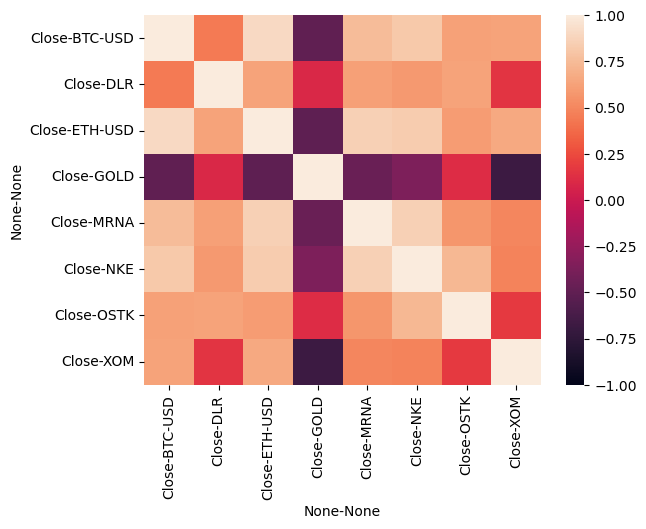

In [120]:
sns.heatmap(correlation_pandemic, vmin=-1, vmax=1)

##### Volatility

In [129]:
#VOLATILITY PANDEMIC TIME (2 years analyzed)
volatility_pandemic = daily_returns_all_data_pandemic.std() * np.sqrt(252*2)
volatility_pandemic.sort_values(inplace=True)
volatility_pandemic

Close  DLR        0.487815
       NKE        0.500116
       GOLD       0.568237
       XOM        0.608290
       BTC-USD    1.067783
       MRNA       1.292745
       ETH-USD    1.456063
       OSTK       1.514587
dtype: float64

# POST PANDEMIC 01/01/2022 TO 06/30/2023

##### Daily Returns

In [132]:
#daily returns during the post pandemic
daily_returns_all_data_post = daily_returns.loc['2022-01-01':'2023-06-30']
daily_returns_all_data_post.std().sort_values(ascending=True)

Close  XOM        0.020615
       DLR        0.022087
       GOLD       0.022979
       NKE        0.023658
       BTC-USD    0.038322
       MRNA       0.040144
       OSTK       0.048500
       ETH-USD    0.049089
dtype: float64

In [133]:
std_bar_post_pandemic = pd.DataFrame(
    {
        "ticker": ['XOM', 'DLR', 'GOLD', 'NKE', 'BTC-USD', 'MRNA', 'OSTK', 'ETH-USD'],
        "standard deviation": (0.020615, 0.022087, 0.022979, 0.023658, 0.038322, 0.040144, 0.048500, 0.049089),
    }
)


std_bar_post_pandemic.hvplot.bar(
    x="ticker", 
    y="standard deviation", 
    xlabel="Ticker", 
    ylabel="standard deviation", 
    title = "STANDARD DEVIATION POST PANDEMIC",
    rot=90
)

:Bars   [ticker]   (standard deviation)

##### Correlation 

In [48]:
#pandemic correlation
correlation_post= all_data.loc['2022-01-01':'2023-06-30'].corr()
correlation_post

Close                                                    \
                BTC-USD       DLR   ETH-USD      GOLD      MRNA       NKE   
Close BTC-USD  1.000000  0.679047  0.972300  0.785269  0.066770  0.753174   
      DLR      0.679047  1.000000  0.699271  0.544329  0.285539  0.582698   
      ETH-USD  0.972300  0.699271  1.000000  0.731814  0.169331  0.764200   
      GOLD     0.785269  0.544329  0.731814  1.000000  0.074519  0.613783   
      MRNA     0.066770  0.285539  0.169331  0.074519  1.000000  0.442948   
      NKE      0.753174  0.582698  0.764200  0.613783  0.442948  1.000000   
      OSTK     0.794258  0.846847  0.803023  0.585600  0.256592  0.604907   
      XOM     -0.637902 -0.827883 -0.637703 -0.402294 -0.101125 -0.403321   

                                   
                   OSTK       XOM  
Close BTC-USD  0.794258 -0.637902  
      DLR      0.846847 -0.827883  
      ETH-USD  0.803023 -0.637703  
      GOLD     0.585600 -0.402294  
      MRNA     0.256592 -0.101125  
      NKE      0.604907 -0.403321  
      OSTK     1.000000 -0.839509  
      XOM     -0.839509  1.000000

##### Volatility

In [49]:
#VOLATILITY POST-PANDEMIC
volatility_post = daily_returns_all_data_post.std() * np.sqrt(252)
volatility_post.sort_values(inplace=True)
volatility_post

Close  XOM        0.327259
       DLR        0.350622
       GOLD       0.364781
       NKE        0.375552
       BTC-USD    0.608346
       MRNA       0.637272
       OSTK       0.769914
       ETH-USD    0.779269
dtype: float64

# THE END... #